# Bitcoin

Huy Nguyen
ECO 590
Spring 2023

![here is a gif](https://media.giphy.com/media/IgiVDEpoMTk0PEVbuW/giphy.gif)


This notebook contains the code for Alpha vantage API and construction of Graphs

## Motivation

For this project, I'm combining my knowledge of finance and economics to conduct research on the impact of global events on interaction between financial assets. Specifically, I'm interested in the rise of bitcoin and its impact on traditional investments like the S&P 500, gold, and the US dollar. One prominent global event that has impacted these assets in recent years is the COVID-19 pandemic

## Research questions:

- During market panic, do investors consider bitcoin a safe haven or a risky asset?

- If bitcoin is a risky asset, how can we hedge against it during market downturn?


In [1]:
import yfinance as yf
import numpy as np
from datetime import datetime
import pprint
import pandas as pd
import requests

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

pp = pprint.PrettyPrinter(indent=1)  


# 1. Constructing variables data frame

## a. Dependent variables

### Collect data on the stock market

- Sort values in data frame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- Combine data frames vertically: https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [2]:
# SPY: SPDR S&P 500 ETF Trust
# GLD: SPDR Gold Shares
# UUP: Invesco DB US Dollar Index Bullish Fund

symbols = ['SPY', 'GLD', 'UUP']
apikey = 'K5FRXCZPDO568KZA'
start = '2017-07-03'
end = '2022-09-25'

# Create empty dictionary to store tickers' symbols as keys and data as value
close_prices = {}
 
# Loop through each api with new ticker
for symbol in symbols:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={symbol}&apikey={apikey}'
    r = requests.get(url)
    data = r.json()['Weekly Time Series']
    
    # Assign value to dictionay keys
    close_prices[symbol] = [float(data[time]['1. open']) for time in data if start <= time <= end]


# Create a dataframe consists of stocks value on monday, weekly open. When retrieve weekly data from alpha vantage,
# we can't choose the closing price on monday, so monday open price is the closest we can get. 
df = pd.DataFrame(close_prices)
df

,SPY,GLD,UUP
0,382.26,154.87,29.50
1,408.78,161.04,29.03
2,393.13,159.17,29.53
3,402.20,161.88,29.12
4,417.05,161.66,29.01
...,...,...,...
268,247.37,120.50,24.21
269,246.79,119.52,24.33
270,245.47,117.42,24.62
271,241.95,115.02,24.87


In [3]:
# Create date value to later make it into date time format. 
# The time showing in date keys is on friday, but we are using data at the start of that week,
date = [time for time in data.keys() if start <= time <= end]
df_date = pd.DataFrame(date)
df_date.head()


,0
0,2022-09-23
1,2022-09-16
2,2022-09-09
3,2022-09-02
4,2022-08-26


In [4]:
# Combine 2 data frames vertically 
df = pd.concat([df_date,df],axis =1)

# rename the first column
df = df.rename(columns={df.columns[0]: 'date'})

df.head()

,date,SPY,GLD,UUP
0,2022-09-23,382.26,154.87,29.50
1,2022-09-16,408.78,161.04,29.03
2,2022-09-09,393.13,159.17,29.53
3,2022-09-02,402.20,161.88,29.12
4,2022-08-26,417.05,161.66,29.01


In [5]:
# Sort the stock value in ascending order of date
df = df.sort_values(by = 'date')
df = df.reset_index(drop = True)
df.head()

,date,SPY,GLD,UUP
0,2017-07-07,242.88,116.54,24.87
1,2017-07-14,241.95,115.02,24.87
2,2017-07-21,245.47,117.42,24.62
3,2017-07-28,246.79,119.52,24.33
4,2017-08-04,247.37,120.50,24.21


### Bitcoin data on yahoo finance

- Yahoo finance documentation: https://pypi.org/project/yfinance/

In [6]:
# Download weekly bitcoin closing price from yahoo finance
btcdata = yf.download('BTC-USD',
                     start='2017-7-3', 
                     end='2022-9-25', interval = '1wk')


btcdata = btcdata.reset_index()
btcdata['Date'] = pd.to_datetime(btcdata['Date'])

btcdata_df = btcdata[['Date', 'Close']]

btcdata_df.head()


[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2017-07-03 00:00:00+00:00,2518.439941
1,2017-07-10 00:00:00+00:00,1929.819946
2,2017-07-17 00:00:00+00:00,2730.399902
3,2017-07-24 00:00:00+00:00,2757.179932
4,2017-07-31 00:00:00+00:00,3213.939941


In [7]:
btcdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-03 00:00:00+00:00,2498.560059,2916.139893,2480.469971,2518.439941,2518.439941,5831748992
1,2017-07-10 00:00:00+00:00,2525.250000,2537.159912,1843.030029,1929.819946,1929.819946,7453121024
2,2017-07-17 00:00:00+00:00,1932.619995,2900.699951,1932.619995,2730.399902,2730.399902,9947990080
3,2017-07-24 00:00:00+00:00,2732.699951,2897.449951,2450.800049,2757.179932,2757.179932,6942860928
4,2017-07-31 00:00:00+00:00,2763.239990,3293.290039,2668.590088,3213.939941,3213.939941,8137841920
...,...,...,...,...,...,...,...
268,2022-08-22 00:00:00+00:00,21531.462891,21804.908203,19616.814453,19616.814453,19616.814453,223346042309
269,2022-08-29 00:00:00+00:00,19615.154297,20542.644531,19600.785156,19986.712891,19986.712891,208511390280
270,2022-09-05 00:00:00+00:00,19988.789062,21770.552734,18644.466797,21769.255859,21769.255859,259528892947
271,2022-09-12 00:00:00+00:00,21770.148438,22673.820312,19387.492188,19419.505859,19419.505859,261900187496


In [8]:
# Combine stocks data and bitcoin data

df1 = pd.concat([btcdata_df,df], axis =1)

df1.head()

# In this table, we will see the date of stocks on friday, but the stocks values collected are monday open price
# ,which is the date -4 days. 
# The Date and value of bitcoin data is on monday. 

,Date,Close,date,SPY,GLD,UUP
0,2017-07-03 00:00:00+00:00,2518.439941,2017-07-07,242.88,116.54,24.87
1,2017-07-10 00:00:00+00:00,1929.819946,2017-07-14,241.95,115.02,24.87
2,2017-07-17 00:00:00+00:00,2730.399902,2017-07-21,245.47,117.42,24.62
3,2017-07-24 00:00:00+00:00,2757.179932,2017-07-28,246.79,119.52,24.33
4,2017-07-31 00:00:00+00:00,3213.939941,2017-08-04,247.37,120.50,24.21


In [9]:
# Cleaning stocks and bitcoin price data frame
df1 = df1.drop(['date','Date'], axis=1)



In [10]:
df1.head()

,Close,SPY,GLD,UUP
0,2518.439941,242.88,116.54,24.87
1,1929.819946,241.95,115.02,24.87
2,2730.399902,245.47,117.42,24.62
3,2757.179932,246.79,119.52,24.33
4,3213.939941,247.37,120.50,24.21


In [11]:
# Convert all the price into float type for caluculation
df1 = df1.astype(float)

returns = df1.pct_change()*100  # calculate return with (%) unit
returns = returns.dropna()     # drop NA rows

returns = returns.rename(columns={'Close': 'BTC'})

returns.head()

,BTC,SPY,GLD,UUP
1,-23.372405,-0.382905,-1.304273,0.000000
2,41.484697,1.454846,2.086594,-1.005227
3,0.980810,0.537744,1.788452,-1.177904
4,16.566202,0.235018,0.819946,-0.493218
5,26.737278,0.048510,-0.887967,0.247831


### Calculate covariances between bitcoin and other assets to be independent variables

- Calculate covariance: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html
- Rolling window: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
- Select only some of rows or columns: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [12]:
# Calculate covariances
tickers = ['BTC','SPY', 'GLD', 'UUP']
for i, ticker1 in enumerate(tickers[:-1]):      # function enumerate() iterates through both index and value 
                                                # of the element in the list
    for ticker2 in tickers[i+1:]:       # Loop through the list starting from the next ticker to ticker 1
        # Calculate covariance using rolling 12-period windown
        returns[f"{ticker1}-{ticker2}"] = returns[ticker1].rolling(12).cov(returns[ticker2])

returns.tail(15)


,BTC,SPY,GLD,UUP,BTC-SPY,BTC-GLD,BTC-UUP,SPY-GLD,SPY-UUP,GLD-UUP
258,-23.201653,-8.421332,-0.943232,2.601686,15.973079,1.536126,-4.234482,1.343403,-2.105900,-1.234247
259,2.306316,-2.095564,-0.070102,-0.571429,13.870799,1.300207,-5.361609,1.043319,-2.222414,-1.321227
260,-8.228442,5.152061,-0.271834,-0.359195,13.051128,1.367517,-5.461005,1.084744,-2.545086,-1.303397
261,8.101606,-3.879299,-2.001817,2.559481,9.762355,-0.292368,-2.859853,1.575444,-3.003552,-1.697530
262,-0.388800,2.652442,-3.140328,1.441125,11.506626,-2.142958,-2.515087,0.927427,-2.701153,-1.879728
263,8.805958,0.655695,-1.142469,-0.623701,13.635484,-1.705491,-3.999930,0.156168,-2.737300,-1.663095
264,3.218750,1.897626,0.349825,-1.011158,13.349629,-2.010122,-3.690640,0.123224,-2.716099,-1.621395
265,-0.689920,3.385976,2.701693,-0.704473,13.037370,-1.035046,-3.810071,1.272059,-2.988252,-1.885134
266,4.933762,1.490896,0.636441,0.851366,13.586159,-0.869783,-3.316857,0.943477,-2.835930,-1.677624
267,-11.452669,2.291391,-0.024092,-0.316567,11.819108,-0.737762,-3.070704,1.616911,-3.413725,-1.055325


In [13]:
# Take only the covariances of bitcoin with other assets

covariances = returns.loc[ : ,['BTC-SPY','BTC-GLD','BTC-UUP']]
covariances.tail()

,BTC-SPY,BTC-GLD,BTC-UUP
268,11.294641,0.438299,-3.883041
269,10.127023,1.137399,-4.210151
270,-9.314597,-0.610227,0.887364
271,-12.181134,-2.410594,3.167188
272,-6.794196,-1.269950,2.259430


## Independent Variables

### CBOE VIX and 3 month treasury bill (IRX)

- Deal with multi-level data: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html

In [14]:

data2 = yf.download(('^IRX','^VIX'),
                     start='2017-7-3', 
                     end='2022-9-25', interval = '1wk')
data2 = data2.reset_index()

vix = data2[['Date','Close']]

# Cleaning the table
vix.columns = vix.columns.droplevel()

vix = vix.rename(columns={'':'date','^IRX': 'IRX', '^VIX': 'VIX'})

# I want to use the basis point to interpret, so i multiplied the interest rate by 100
vix['IRX']= vix['IRX']*100

vix.head()

[*********************100%***********************]  2 of 2 completed


,date,IRX,VIX
0,2017-07-03 00:00:00-04:00,100.800002,11.19
1,2017-07-10 00:00:00-04:00,100.800002,9.51
2,2017-07-17 00:00:00-04:00,113.800001,9.36
3,2017-07-24 00:00:00-04:00,105.299997,10.29
4,2017-07-31 00:00:00-04:00,105.299997,10.03


### BITCOIN POPULARITY


In [15]:
# The data is collected from google trends. They only provide weekly data for 5 years or less time frame.
btc_popularity = pd.read_csv('bitcoin_popularity_volatility.csv', sep = ';')

btc_popularity.tail()

,time,gg_trend_wrld,btc_garch
268,22/08/2022,17,"56,24453807"
269,29/08/2022,18,"45,31278637"
270,05/09/2022,17,"55,57379792"
271,12/09/2022,17,"73,3579912"
272,19/09/2022,18,"52,57561772"


## Construct the final dataset



In [16]:
df2 = pd.concat([vix, covariances], axis =1)

df2.head()

,date,IRX,VIX,BTC-SPY,BTC-GLD,BTC-UUP
0,2017-07-03 00:00:00-04:00,100.800002,11.19,NaN,NaN,NaN
1,2017-07-10 00:00:00-04:00,100.800002,9.51,NaN,NaN,NaN
2,2017-07-17 00:00:00-04:00,113.800001,9.36,NaN,NaN,NaN
3,2017-07-24 00:00:00-04:00,105.299997,10.29,NaN,NaN,NaN
4,2017-07-31 00:00:00-04:00,105.299997,10.03,NaN,NaN,NaN


In [17]:
df3 = pd.concat([df2,btc_popularity], axis = 1)
df3

# this data frame is to check we have the same date for data retrieved online and data from csv file 

,date,IRX,VIX,BTC-SPY,BTC-GLD,BTC-UUP,time,gg_trend_wrld,btc_garch
0,2017-07-03 00:00:00-04:00,100.800002,11.190000,NaN,NaN,NaN,03/07/2017,.,"53,62767006"
1,2017-07-10 00:00:00-04:00,100.800002,9.510000,NaN,NaN,NaN,10/07/2017,.,"73,76204382"
2,2017-07-17 00:00:00-04:00,113.800001,9.360000,NaN,NaN,NaN,17/07/2017,.,"128,6168412"
3,2017-07-24 00:00:00-04:00,105.299997,10.290000,NaN,NaN,NaN,24/07/2017,.,"97,60370461"
4,2017-07-31 00:00:00-04:00,105.299997,10.030000,NaN,NaN,NaN,31/07/2017,.,"82,27699884"
...,...,...,...,...,...,...,...,...,...
268,2022-08-22 00:00:00-04:00,275.500011,25.559999,11.294641,0.438299,-3.883041,22/08/2022,17,"56,24453807"
269,2022-08-29 00:00:00-04:00,281.999993,25.469999,10.127023,1.137399,-4.210151,29/08/2022,18,"45,31278637"
270,2022-09-05 00:00:00-04:00,296.799994,22.790001,-9.314597,-0.610227,0.887364,05/09/2022,17,"55,57379792"
271,2022-09-12 00:00:00-04:00,306.999993,26.299999,-12.181134,-2.410594,3.167188,12/09/2022,17,"73,3579912"


In [18]:
dataset = df3.drop('time', axis = 1)
dataset

,date,IRX,VIX,BTC-SPY,BTC-GLD,BTC-UUP,gg_trend_wrld,btc_garch
0,2017-07-03 00:00:00-04:00,100.800002,11.190000,NaN,NaN,NaN,.,"53,62767006"
1,2017-07-10 00:00:00-04:00,100.800002,9.510000,NaN,NaN,NaN,.,"73,76204382"
2,2017-07-17 00:00:00-04:00,113.800001,9.360000,NaN,NaN,NaN,.,"128,6168412"
3,2017-07-24 00:00:00-04:00,105.299997,10.290000,NaN,NaN,NaN,.,"97,60370461"
4,2017-07-31 00:00:00-04:00,105.299997,10.030000,NaN,NaN,NaN,.,"82,27699884"
...,...,...,...,...,...,...,...,...
268,2022-08-22 00:00:00-04:00,275.500011,25.559999,11.294641,0.438299,-3.883041,17,"56,24453807"
269,2022-08-29 00:00:00-04:00,281.999993,25.469999,10.127023,1.137399,-4.210151,18,"45,31278637"
270,2022-09-05 00:00:00-04:00,296.799994,22.790001,-9.314597,-0.610227,0.887364,17,"55,57379792"
271,2022-09-12 00:00:00-04:00,306.999993,26.299999,-12.181134,-2.410594,3.167188,17,"73,3579912"


## Create time dummy variable for covid shock period, from Jan 2020 to end of Aug 2020
- np.where documentation: https://numpy.org/doc/stable/reference/generated/numpy.where.html
- df.replace: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
- df.nan: https://pandas.pydata.org/docs/user_guide/missing_data.html

In [19]:
dataset['covid'] = 0

start_covid = '2020-01-01'
end_covid = '2020-08-31'

requirement = (dataset['date'] >= start_covid) & (dataset['date'] <= end_covid)

dataset['covid'] = np.where(requirement, 1, 0)

dataset

,date,IRX,VIX,BTC-SPY,BTC-GLD,BTC-UUP,gg_trend_wrld,btc_garch,covid
0,2017-07-03 00:00:00-04:00,100.800002,11.190000,NaN,NaN,NaN,.,"53,62767006",0
1,2017-07-10 00:00:00-04:00,100.800002,9.510000,NaN,NaN,NaN,.,"73,76204382",0
2,2017-07-17 00:00:00-04:00,113.800001,9.360000,NaN,NaN,NaN,.,"128,6168412",0
3,2017-07-24 00:00:00-04:00,105.299997,10.290000,NaN,NaN,NaN,.,"97,60370461",0
4,2017-07-31 00:00:00-04:00,105.299997,10.030000,NaN,NaN,NaN,.,"82,27699884",0
...,...,...,...,...,...,...,...,...,...
268,2022-08-22 00:00:00-04:00,275.500011,25.559999,11.294641,0.438299,-3.883041,17,"56,24453807",0
269,2022-08-29 00:00:00-04:00,281.999993,25.469999,10.127023,1.137399,-4.210151,18,"45,31278637",0
270,2022-09-05 00:00:00-04:00,296.799994,22.790001,-9.314597,-0.610227,0.887364,17,"55,57379792",0
271,2022-09-12 00:00:00-04:00,306.999993,26.299999,-12.181134,-2.410594,3.167188,17,"73,3579912",0


In [20]:
# Rename the columns
df5 = dataset.set_axis(['date', 'tbill', 'vix','cov_bspy', 'cov_bgld', 'cov_busd','gg_trend_wrld',
                        'btc_garch','covid'], axis=1)

# cleaning the NA values
df5 = df5.replace('.', np.nan)   
df5 = df5.dropna()

# adjust type of all the columns to desire format
df5['gg_trend_wrld'] = df5['gg_trend_wrld'].astype(float)  # turn the gg_trend_wrld column to float type
df5['btc_garch'] = df5['btc_garch'].str.replace(',', '.').astype(float) # turn the bitcoin volatile column to float type

df5


,date,tbill,vix,cov_bspy,cov_bgld,cov_busd,gg_trend_wrld,btc_garch,covid
18,2017-11-06 00:00:00-05:00,120.000005,11.290000,-2.175095,-3.864409,2.649953,28.0,69.374570,0
19,2017-11-13 00:00:00-05:00,124.000001,11.430000,-4.149409,-2.170380,0.510605,31.0,88.672892,0
20,2017-11-20 00:00:00-05:00,124.000001,9.670000,-4.150204,-1.367205,-0.387232,27.0,74.842952,0
21,2017-11-27 00:00:00-05:00,123.500001,11.430000,-2.921694,4.497872,-1.938926,62.0,111.272903,0
22,2017-12-04 00:00:00-05:00,125.300002,9.580000,0.528849,2.162319,-2.570922,87.0,122.140997,0
...,...,...,...,...,...,...,...,...,...
268,2022-08-22 00:00:00-04:00,275.500011,25.559999,11.294641,0.438299,-3.883041,17.0,56.244538,0
269,2022-08-29 00:00:00-04:00,281.999993,25.469999,10.127023,1.137399,-4.210151,18.0,45.312786,0
270,2022-09-05 00:00:00-04:00,296.799994,22.790001,-9.314597,-0.610227,0.887364,17.0,55.573798,0
271,2022-09-12 00:00:00-04:00,306.999993,26.299999,-12.181134,-2.410594,3.167188,17.0,73.357991,0


In [21]:
df5.to_csv('eco590_project_data.csv', index=False)  


In [22]:
df5.describe()

,tbill,vix,cov_bspy,cov_bgld,cov_busd,gg_trend_wrld,btc_garch,covid
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,111.321569,20.410118,2.498511,-2.704242,0.993996,21.043137,67.604661,0.137255
std,95.755569,8.345464,9.915798,6.367252,3.164353,15.373119,24.612861,0.344793
min,-5.800000,9.220000,-21.524296,-26.782293,-5.461005,6.000000,36.744210,0.000000
25%,8.300000,14.850000,-2.394157,-4.675520,-1.212192,10.000000,51.652433,0.000000
50%,135.500002,18.559999,1.150417,-1.868501,0.637997,16.000000,60.068708,0.000000
75%,195.500004,24.490000,5.396253,1.121521,2.294879,27.000000,75.839375,0.000000
max,310.800004,66.040001,47.373208,10.143276,13.008234,100.000000,179.208595,1.000000


# 2. Creating plots

- Save figure: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html


## Line graphs for covariances between assets over time

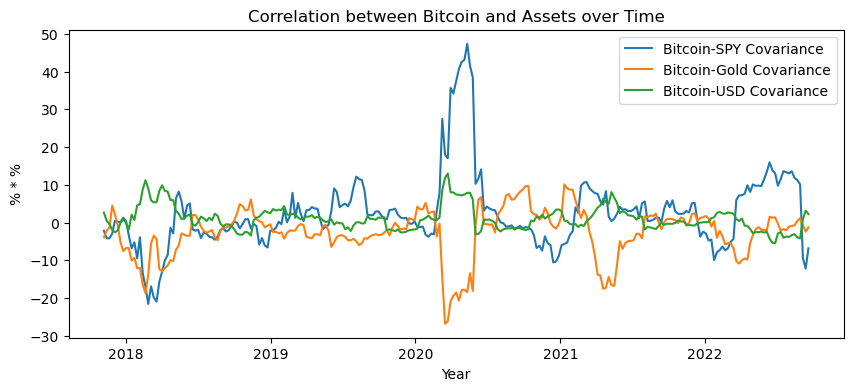

In [23]:

fig, ax = plt.subplots(figsize=(10, 4)) 

ax.plot(df5['date'], df5['cov_bspy'], label='Bitcoin-SPY Covariance')
ax.plot(df5['date'], df5['cov_bgld'], label='Bitcoin-Gold Covariance')
ax.plot(df5['date'], df5['cov_busd'], label='Bitcoin-USD Covariance')

ax.set_xlabel('Year') # adding the x label
ax.set_ylabel('% * %') #adding the y label
ax.set_title("Correlation between Bitcoin and Assets over Time")
ax.legend()

plt.savefig('Correlation btw btc-assets over time.png')
plt.show()


## Line graphs for short-term market expectation

- Space between subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

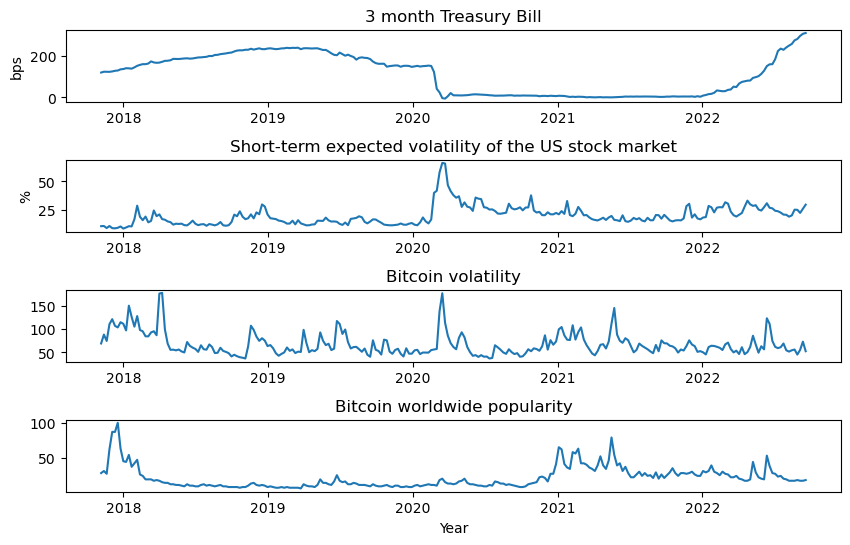

In [24]:
# Learn in class

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6)) 

# 3 month Treasury plot
ax1.plot(df5['date'], df5['tbill'])
ax1.set_ylabel('bps') #adding the y label
ax1.set_title("3 month Treasury Bill")

# VIX plot
ax2.plot(df5['date'], df5['vix'])
ax2.set_ylabel('%') #adding the y label
ax2.set_title("Short-term expected volatility of the US stock market")

# bitcoin volatility plot
ax3.plot(df5['date'], df5['btc_garch'])
ax3.set_ylabel('')  #adding the y label
ax3.set_title("Bitcoin volatility")

# bitcoin popularity plot

ax4.plot(df5['date'], df5['gg_trend_wrld']) 
ax4.set_ylabel('') #adding the y label
ax4.set_title("Bitcoin worldwide popularity")

ax4.set_xlabel('Year') # adding the x label


plt.subplots_adjust(hspace= 0.8)    # adjust place between subplots

plt.savefig('Flight to safe behavior observed in bitcoin')
plt.show()

## Boxplot

- How to create boxplot for multiple columns: https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn

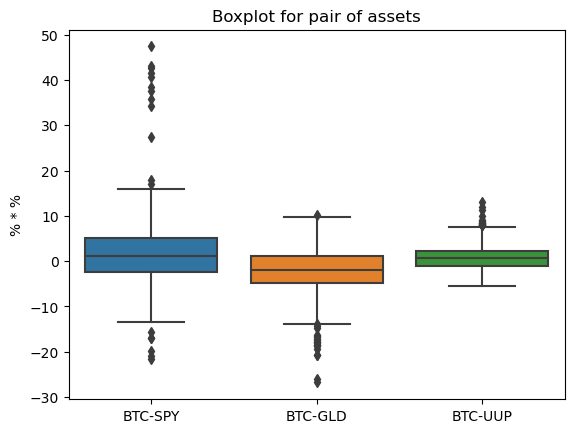

In [26]:

sns.boxplot(x="variable", y="value", data=pd.melt(covariances))
plt.title('Boxplot for pair of assets')
plt.xlabel('')
plt.ylabel('% * %')

plt.savefig('Boxplot covariance of assets pairs')
